### Some primary results based on the theoretical results of TRUE COST 2.0 by M. Majka and T. Nagapetyan (Only for Results relating to Variance and Strong convergence)

General setting:

$$dX_t=a(X_t)\mathrm{d}t+\beta\mathrm{d}W_t$$

with the Euler scheme

$$\theta_{k+1}=\theta_{k}+ha(\theta_k)+\beta \sqrt{h} Z_{k+1},$$

where $Z_{k+1}\sim N(0,1)$

In [7]:
from funcs import *

Generate data for the subsampling.
 \begin{align*}
 \label{eq:toymodel}
 \begin{aligned}
 \theta & \sim  \mathcal{N}(0,\sigma_{\theta}^{2}),\\
 XX_{i} \,|\, \theta & \stackrel{i.i.d.}{\sim} \mathcal{N}(\theta,\sigma_{x}^{2}) &&\text{for $i=1,\ldots,m$.}
 \end{aligned}
 \end{align*}
 Total of datapoints is defined in this simulation as 
 $$m = s\cdot\mathrm{data\_mult}^{\mathrm{data\_length}}.$$

The example considered:
    $$a(X_t):=-\frac{X_t-\mu_p}{2\sigma^2_p},\quad \text{and }\beta:=1,$$
where $$\mu_p:=\frac{\sum_{i=1}^m y_i}{\frac{\sigma_x^2}{\sigma_\theta^2}+m}\qquad \text{and }\sigma^2_p:=\big(\frac{1}{\sigma^2_\theta}+\frac{m}{\sigma^2_x}\big)^{-1}$$ for different $m$.

It is well known this gives an Ornstein–Uhlenbeck process with 
$$\mathbb{E}[X_t]=x_0e^{- t/2\sigma^2_p}+\mu_p (1-e^{- t/2\sigma^2_p}), \quad  \text{and }\mathbb{V}[X_t]=\sigma_p^2(1-e^{- t/\sigma^2_p}), $$
and in the long-run, it admits an invariant measure $\mathcal{N}(\mu_p,\sigma_p^2)$.

 %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
 The posterior distribution is  
 \begin{equation*}
 \pi=\mathcal{N}(\mu_{p},\sigma_{p}^{2})=\mathcal{N}\left(\frac{\sum\limits_{i=1}^{m}y_{i}}{\frac{\sigma_{x}^{2}}{\sigma_{\theta}^{2}}+m},\left(\frac{1}{\sigma_{\theta}^{2}}+\frac{m}{\sigma_{x}^{2}}\right)^{-1}\right).\label{eq:SGaussianPosterior}
 \end{equation*}
 The original equation is
 \begin{equation*}
 d\theta(t)=-\frac{1}{2}\left(\frac{\theta(t)-\mu_{p}}{\sigma_{p}^{2}}\right)dt+dW_{t},\label{eq:Lan_OU}.
 \end{equation*}
 The full Euler discretization with $\xi_{k}\stackrel{i.i.d.}{\sim}\mathcal{N}(0,1)$ and $\theta_0=x_0$ in the scaled case is
 \begin{equation}
 \theta_{k+1}=\theta_k-\frac{1}{2}\left(\frac{\theta_k-\mu_{p}}{\sigma_{p}^{2}}\right)\cdot\frac{h}{m}+\sqrt{\frac{h}{m}}\xi_{k},\label{euler}
 \end{equation}
 The numerical discretisation with explicit Euler scheme with subsampling reads
 \begin{equation}
 \theta_{k+1}=\theta_k-\frac{1}{2}\left(\frac{\theta_k-\mu_{sgd}}{\sigma_{p}^{2}}\right)\cdot\frac{h}{m}+\sqrt{\frac{h}{m}}\xi_{k},
 \end{equation}
 with $$\mu_{sgd}=\frac{m}{s}\frac{\sum\limits_{i=1}^{s}y_{\tau_{ki}}}{\frac{\sigma_{x}^{2}}{\sigma_{\theta}^{2}}+m}$$
 where $\tau_k=(\tau_{k1},\cdots,\tau_{kn})$ denote a random subset of $[m]=\{1,\cdots,m\}$ 
 generated by sampling without replacement from
 $[N]$, independently for each $k$.

Following the conditions in the manuscript, the one-sided Lip constant and global Lip constant are the same, ie, $$K=L=1/(2\sigma_p^2)\sim m.$$



In [8]:
sig_th, sig_x=0.2, 0.15

data_mult, data_len, s= 2,5, 32

Now generate lists of datas, value of m, posterior means and posterior variance

In [9]:
X_list, m_list, var_post_list, mu_post_list =data_generation(sig_th,
                                                             sig_x,
                                                             data_mult,
                                                             data_len,
                                                             s)

theta= 0.2580601313800176


In [10]:
print("The value of m \n",m_list)
print("The posterior mean of different m \n", mu_post_list)
print("The posterior variance of different m \n", var_post_list)

The value of m 
 [ 2048.  4096.  8192. 16384. 32768.]
The posterior mean of different m 
 [0.25384762 0.25754737 0.25923098 0.25923142 0.25854778]
The posterior variance of different m 
 [1.09833115e-05 5.49240979e-06 2.74639345e-06 1.37324387e-06
 6.86633721e-07]


Now we compute the MSE 
$$\mathbb{E}\Big[\big|\int_{\mathbb{R}^d}f(x)\,\mathrm{d}x-\frac{1}{N}\sum_{i=1}^N f(\theta_i)\big|^2\Big]$$

In [5]:
func = lambda y :np.sin(y)+np.abs(y)+1 # functional

gt_list=ref_im_sols(mu_post_list, var_post_list,func)
print(m_list)
print(gt_list)
print(mu_post_list)

[ 2048.  4096.  8192. 16384. 32768.]
[1.00001306 1.00001191 1.00001031 1.00000969 1.0000096 ]
[-0.04254076 -0.04137153 -0.03948381 -0.03871066 -0.03860036]


In [6]:
h_list=[0.01*2**(-i) for i in range(2,5)]
g=1
initial=0.1
n_experiments=5*10**3

epsilon=10**(-3)/2

euler_sols, sgd_sols,euler_vars, sgd_vars=functional_sols_generator(n_experiments,
                                                                   epsilon,
                                                                   h_list, 
                                                                   f,
                                                                   g,
                                                                   initial,
                                                                   s,
                                                                   sig_th,
                                                                   sig_x,
                                                                   X_list, 
                                                                   m_list, 
                                                                   mu_post_list,
                                                                   var_post_list, 
                                                                   func)

Print error of $f(\text{sol})$ for different m

In [10]:
full_err_euler, full_err_sgd=final_error(gt_list,euler_sols, sgd_sols)

In [11]:
print(full_err_euler, "\n")

print(full_err_sgd)

[[1.02073235e-15 7.93806170e-16 3.65610238e-15]
 [1.77610527e-17 1.07175897e-15 4.41173281e-16]
 [7.86786412e-16 3.83229184e-17 8.45762781e-17]
 [5.13007236e-16 4.12636198e-18 1.11269931e-16]
 [1.19012713e-16 1.51306866e-16 8.19294787e-20]] 

[[1.52321960e-11 1.65839800e-11 2.81365863e-13]
 [3.56461980e-12 2.94552188e-12 1.25588724e-12]
 [9.79107592e-12 1.18139202e-12 5.69054536e-13]
 [1.08302773e-11 3.33460043e-12 1.24557012e-12]
 [1.81126584e-11 3.47858091e-12 3.57329611e-13]]


Print variance of $f(\text{sol})$ for different m

Note from Thm 3.4, $Var(full$_$sampling)\sim  1/m$

and from Thm 4.6, $Var(f)\sim \frac{1}{m}+h\frac{m-s}{ms}$ 

$\sim 1/m+h\frac{1}{m^2}\sim 1/m$ when s is large 
and

$\sim 1/m+h$  when s is small

In [12]:
for i in range(len(m_list)):
    
    print("m=",m_list[i])
    print(euler_vars[i])

    print(sgd_vars[i], "\n")

m= 2048.0
[9.575739330414433e-12, 9.241585788158263e-12, 9.796231340431692e-12]
[6.0106965231131665e-12, 5.834008347677733e-12, 9.918842334517666e-12] 

m= 4096.0
[4.143445206969218e-12, 4.210762564861496e-12, 4.165867082666228e-12]
[3.370215184317545e-12, 3.445546194124473e-12, 3.679714086825923e-12] 

m= 8192.0
[1.7169699017071488e-12, 1.7172188646430228e-12, 1.681105488794322e-12]
[1.053765998900407e-12, 1.465357632794706e-12, 1.5458719855349728e-12] 

m= 16384.0
[7.876074519357488e-13, 7.862348065015234e-13, 7.82289335755481e-13]
[4.606174163884412e-13, 6.021468347267322e-13, 6.801921978500755e-13] 

m= 32768.0
[4.009819397192635e-13, 3.756804219765182e-13, 3.8067395277756303e-13]
[1.8135381574074443e-13, 4.87392034861822e-13, 4.117028038947796e-13] 



Regression coefficient is  1.1784040766692039


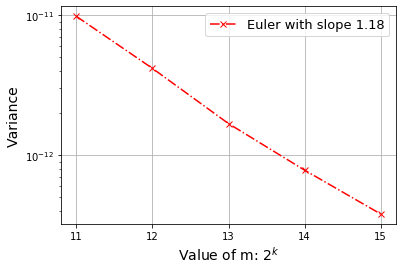

In [13]:
i_list=np.array([np.log2(m_list[j]) for j in range(len(m_list))])

euler_vars_last=[euler_vars[j][-1] for j in range(len(m_list))]


slope_plot(i_list,
           euler_vars_last, 
           i_list,
           label="Euler with slope", 
           ylabel="Variance",
           xlabel=r"Value of m: $2^k$")

Regression coefficient is  1.1616572448274767


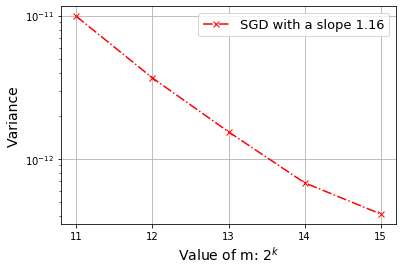

In [14]:
sgd_vars_last=[sgd_vars[j][-1] for j in range(len(m_list))]


slope_plot(i_list,
           sgd_vars_last,
           i_list,           
           label="SGD with a slope", 
           ylabel="Variance",
           xlabel=r"Value of m: $2^k$")

In [16]:
_, _,euler_vars2, sgd_vars2=functional_sols_generator(n_experiments,
                                                                   epsilon,
                                                                   h_list, 
                                                                   f,
                                                                   g,
                                                                   initial,
                                                                   0,
                                                                   sig_th,
                                                                   sig_x,
                                                                   X_list, 
                                                                   m_list, 
                                                                   mu_post_list,
                                                                   var_post_list, 
                                                                   func)

In [17]:
for i in range(len(m_list)):
    
    print("m=",m_list[i])
    print(euler_vars2[i])

    print(sgd_vars2[i], "\n")

m= 2048.0
[9.278243432715373e-12, 9.66635093868726e-12, 9.446604858477845e-12]
[9.42671430356234e-12, 9.305621327609082e-12, 9.410372082519294e-12] 

m= 4096.0
[4.2850923472857446e-12, 4.134672174139391e-12, 4.099016363662028e-12]
[4.284077404102518e-12, 4.029229041658379e-12, 3.885569311882486e-12] 

m= 8192.0
[1.7118588815535776e-12, 1.6591812372801365e-12, 1.6591122142614715e-12]
[1.6713910454085381e-12, 1.7048207385733858e-12, 1.658546636247682e-12] 

m= 16384.0
[7.934955310448878e-13, 8.172920367312553e-13, 7.563350740742923e-13]
[7.503118244078199e-13, 8.281273695236987e-13, 7.029344043172143e-13] 

m= 32768.0
[3.978028859171113e-13, 3.879586588069281e-13, 3.810737468935529e-13]
[3.792289798334352e-13, 3.893827959563239e-13, 3.8156075254731675e-13] 



Regression coefficient is  1.1701487894961353


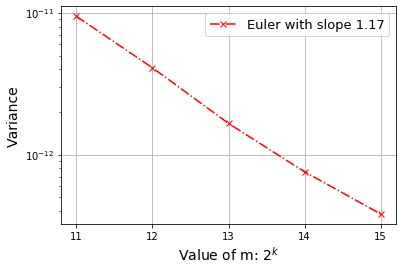

In [18]:
i_list=np.array([np.log2(m_list[j]) for j in range(len(m_list))])

euler_vars_last=[euler_vars2[j][-1] for j in range(len(m_list))]


slope_plot(i_list,
           euler_vars_last, 
           i_list,
           label="Euler with slope", 
           ylabel="Variance",
           xlabel=r"Value of m: $2^k$")

Regression coefficient is  1.171519818363298


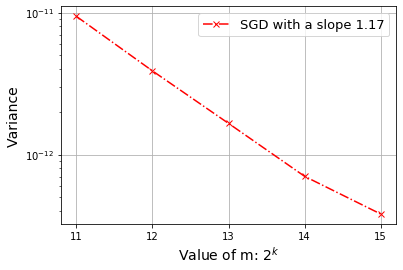

In [19]:
sgd_vars_last=[sgd_vars2[j][-1] for j in range(len(m_list))]


slope_plot(i_list,
           sgd_vars_last,
           i_list,           
           label="SGD with a slope", 
           ylabel="Variance",
           xlabel=r"Value of m: $2^k$")

**Strong convergence (Thm 3.3 and Thm 4.5)**

We will take $h:=2^{-i}\cdot m[0]^{-1}$, $i\in \{5,6,7,8,9\}$, with reference stepsize $2^{-12}\cdot m[0]^{-1}$.

In [11]:
h_ref=2**(-12)/m_list[0]
T=3
n_ref=int(T/h_ref)
n_experiments=10

W=BMBase(h_ref,n_ref,n_experiments)

In [12]:
g=1
args_f=[mu_post_list[0],var_post_list[0]]
initial=0.1
sol_ref=ref_pathwise_sols_generator(W, 
                                      h_ref,
                                      f,
                                      g,
                                      args_f,
                                      initial)

In [14]:
i_list=[i for i in range(6,9)]
h_list=[2**(-i)/m_list[0] for i in i_list]

euler_simulations=euler_path_sols_generator(W,
                                          h_list,
                                          h_ref,
                                          f,
                                          g,
                                          args_f,
                                          initial)

In [15]:
euler_strong_errors=generate_error_list(sol_ref,
                                        euler_simulations)

Regression coefficient is  1.2758257298823135


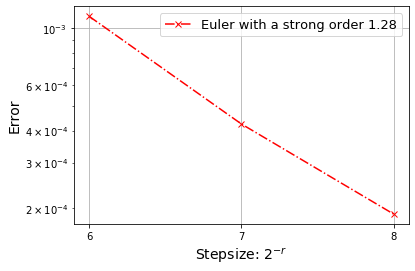

In [20]:
slope_plot(i_list,
           euler_strong_errors,
           i_list,           
           label="Euler with a strong order", 
           ylabel="Error",
           xlabel=r"Stepsize: $2^{-r}$")


The strong order for Euler is very 'stable' in the case if you do the experiments a few time, we will get a similar slope; however, for sgd sampling, things change very significant; I demenstrate the slope with two repeated experiments

In [22]:
sgd_simulations=sgd_path_sols_generator(X_list[0],
                                       s,
                                       sig_th,
                                       sig_x,
                                        W,
                                         h_list,
                                         h_ref,
                                         f,
                                         g,
                                         args_f,
                                         initial)

In [23]:
sgd_strong_errors=generate_error_list2(euler_simulations,
                                    sgd_simulations)

Regression coefficient is  0.9940709114664178


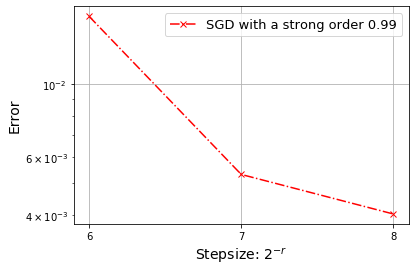

In [24]:
slope_plot(i_list,
           sgd_strong_errors,
           i_list,           
           label="SGD with a strong order", 
           ylabel="Error",
           xlabel=r"Stepsize: $2^{-r}$")

In [25]:
sgd_simulations=sgd_path_sols_generator(X_list[0],
                                       s,
                                       sig_th,
                                       sig_x,
                                        W,
                                         h_list,
                                         h_ref,
                                         f,
                                         g,
                                         args_f,
                                         initial)

In [26]:
sgd_strong_errors=generate_error_list2(euler_simulations,
                                    sgd_simulations)

Regression coefficient is  1.9897079329017604


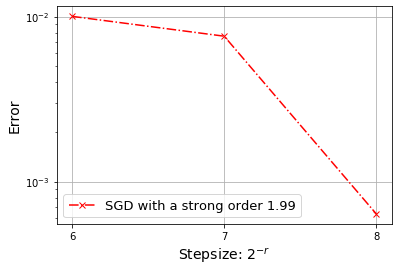

In [27]:
slope_plot(i_list,
           sgd_strong_errors,
           i_list,           
           label="SGD with a strong order", 
           ylabel="Error",
           xlabel=r"Stepsize: $2^{-r}$")